# Target: Understanding the Markov chain Monte Carlo (MCMC) algorithm 



Our target is to generate a sample having distribution $f(x)\propto \exp(-\sin(100x)/x)$ for the support [0,10]



Please write down your aglorithm explicit

1. The proposal distribution: $N(\mu_0, \tau_0^2)$
2. The accepetance rate is $\alpha(y_t|x_{t-1}) = min\left({\frac{f(y_t)}{f(x_{t-1})}{\frac{q(x_{t-1}\vert y_t)}{q(y_t\vert x_{t-1})}},1}\right) $
For numerical stability, we take log here: 

$\log \alpha = min( \log()xxx ,0)$


## Explicit algorithm

We summarize the algorithm:

n = 10000. 

1. Generate a starting point appropriately, $x_1$. 
2. For t = 2: n
    1. Generate $y_t \sim q(y_t|x_{t-1})$.
    2. Calculate $\alpha = min\left( {\frac{f(y_t)q(x_{t-1}\vert y_t)}{f(x_{t-1})q(y_t\vert x_{t-1})}},0\right)$
    3. Generate $u\sim U(0,1)$.
    4. If u < alpha, we set $x_t = y_t$. Otherwise, we set $x_t = x_{t-1}$.
3. Collect $x_1, \ldots, x_n$ 
    1. Draw the time series plots of $x_t$
    2. Draw the ACF of $x_t$
    3. Draw the density estimation of $x_1,\ldots, x_t$
    
    
    

## Independence MH (Wendy)

Here, we assume the proposal distribution is $N(\mu_0, \tau_0^2)$.

- $q(y_t|x_{t-1}) = \frac{1}{\sqrt{2\pi \tau_0^2}}{-(y_t-\mu_0)^2/2\tau_0^2}$ 
- $q(x_{t-1}|y_t) = \frac{1}{\sqrt{2\pi \tau_0^2}}{-(x_{t-1}-\mu_0)^2/2\tau_0^2} $

Thus, 
$\alpha(y_t|x_{x-1}) = 
\min(\frac{f(y_t)\frac{1}{\sqrt{2\pi \tau_0^2}}{-(y_t-\mu_0)^2/2\tau_0^2} }
{f(x_{t-1})\frac{1}{\sqrt{2\pi \tau_0^2}}{-(x_{t-1}-\mu_0)^2/2\tau_0^2}}, 1)$

Take a log



## Random Walk (James) 

We assume that the proposal distribution is $N(x_{t-1},\tau_0^2)$


- $q(y_t|x_{t-1}) = \frac{1}{\sqrt{2\pi \tau_0^2}}\exp^{-(y_t-x_{t-1})^2/2\tau_0^2}$ 
- $q(x_{t-1}|y_t) = \frac{1}{\sqrt{2\pi \tau_0^2}}\exp^{-(x_{t-1} - y_t)^2/2\tau_0^2} $

Thus, the acceptance rate is 
$\alpha(y_t|x_{x-1}) = 
\min(\frac{f(y_t)\frac{1}{\sqrt{2\pi \tau_0^2}}\exp^{-(y_t-x_{t-1})^2/2\tau_0^2}}
{f(x_{t-1}) \frac{1}{\sqrt{2\pi \tau_0^2}}\exp^{-(x_{t-1} - y_t)^2/2\tau_0^2}}, 1) = $



In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [57]:
# Define target distribution function
def target_distribution(x):
    return np.exp(-np.sin(100 * x)/x)

In [63]:
# Proposal distribution
# Indepent MH algorithm 
def proposal_distribution(x, step_size=sig2):
    return np.random.normal(x, step_size)
    #return x + np.random.uniform(-step_size, step_size)
    #return 1/(1+x*x)


In [64]:
# Independence Metropolis-Hastings algorithm
# Random Walk 
def metropolis_hastings(num_samples, proposal_step_size=0.1):
    samples = []
    current_sample = np.random.uniform(0, 10) # 
    
    reject_rate = 0

    for k in range(num_samples): 
        j = proposal_distribution(current_sample, step_size=proposal_step_size)
        u = np.random.uniform()
        
        # T2: Wrong! 
        accepetance_rate = min(1, target_distribution(j)/target_distribution(current_sample))
        
        if u <= accepetance_rate:
            current_sample = j

        samples.append(current_sample)

    return np.array(samples)

In [65]:
# Number of samples to generate
num_samples = 10000
#burn_in = 90000
#step_size=0.1

In [66]:
# Generate samples using Metropolis-Hastings
samples = metropolis_hastings(num_samples)


# 
samples_after_burn_in =samples[-10000:] #  =? 

/var/folders/d4/299g0bm11rg1_wj8twkqwp1c0000gn/T/ipykernel_24214/2141630195.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-np.sin(100 * x)/x)


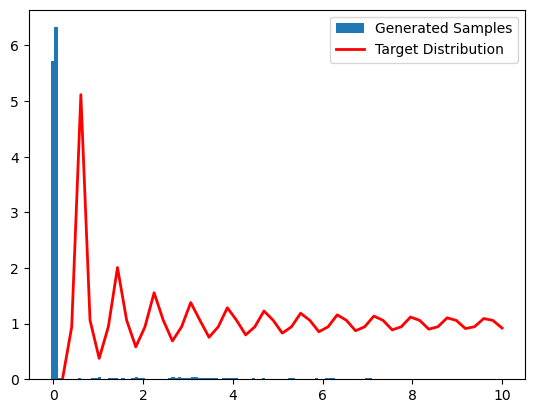

In [67]:
# Plot the results
plt.hist(samples_after_burn_in, bins=100, density=True, label='Generated Samples')
x_values = np.linspace(0, 10)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution', linewidth=2, color='red')
plt.legend()
plt.show()

/var/folders/d4/299g0bm11rg1_wj8twkqwp1c0000gn/T/ipykernel_23249/2724669455.py:6: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-np.sin(100 * x) / x)


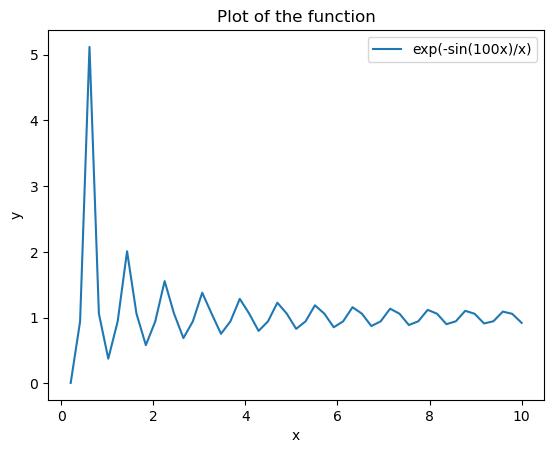

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def my_function(x):
    return np.exp(-np.sin(100 * x) / x)

# Generate x values
x_values = np.linspace(0, 10)

# Calculate corresponding y values
y_values = my_function(x_values)

# Plot the function
plt.plot(x_values, y_values, label='exp(-sin(100x)/x)')
plt.title('Plot of the function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 0302 Random walk MH

/var/folders/d4/299g0bm11rg1_wj8twkqwp1c0000gn/T/ipykernel_24214/2141630195.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(-np.sin(100 * x)/x)


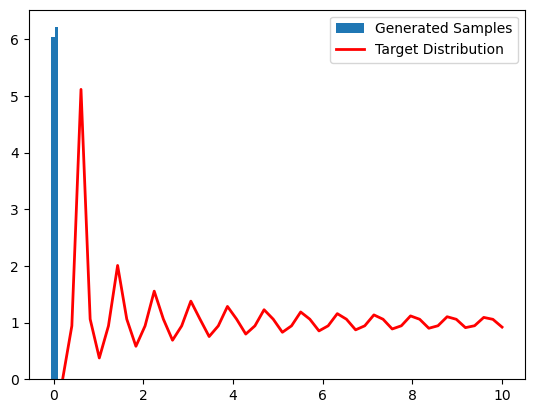

In [72]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the target density function f(x)
def target_density(x):
    return np.exp(-np.sin(100 * x) / x)

# Define the proposal distribution using random walk MH
def random_walk_proposal(x, step_size):
    return x + step_size * np.random.randn()

# Metropolis-Hastings algorithm
def metropolis_hastings(num_samples, burn_in, step_size):
    samples = []
    current_sample = np.random.uniform(0, 10)  # Start with a random initial sample
    reject_rate = 0

    for k in range(num_samples + burn_in):
        j = random_walk_proposal(current_sample, step_size)
        u = np.random.uniform()
        accepetance_rate = min(1, target_distribution(j)/target_distribution(current_sample))

        # Accept the proposed sample with probability acceptance_ratio
        if u <= accepetance_rate:
            current_sample = j

        # Only collect samples after burn-in period
        if num_samples >= burn_in:
            samples.append(current_sample)

    return np.array(samples)

# Set the number of samples, burn-in, and step size for the random walk
num_samples = 100000
burn_in = 90000  # Burn-in period to discard initial samples
step_size = 0.1

# Generate samples using Metropolis-Hastings with burn-in
samples = metropolis_hastings(num_samples, burn_in, step_size)

plt.hist(samples, bins=100, density=True, label='Generated Samples')
x_values = np.linspace(0, 10)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution', linewidth=2, color='red')
plt.legend()
plt.show()